In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM  
from tensorflow.keras.models import Sequential  
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)

In [4]:
data = data['passengers']

In [5]:
data=np.array(data).reshape(-1,1)

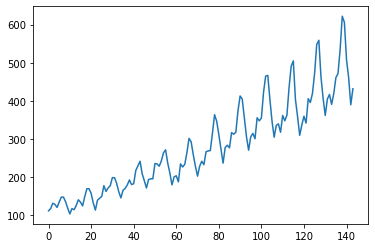

In [6]:
plt.plot(data)
plt.show()


In [7]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [8]:
data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [9]:
train = data[0:100,:]
test = data[100:,:]



In [10]:
def get_data(data, steps):      
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
steps = 2

In [12]:
X_train, y_train = get_data(train, steps)
X_test, y_test = get_data(test, steps)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [14]:
model = Sequential()
model.add(LSTM(128, input_shape = (1, steps)))  
model.add(Dense(64))                                  
model.add(Dense(1))   
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [15]:
X_train.shape

(97, 1, 2)

In [16]:
X_test.shape

(41, 1, 2)

In [17]:
X_test

array([[[0.48455598, 0.61389961]],

       [[0.61389961, 0.6969112 ]],

       [[0.6969112 , 0.7007722 ]],

       [[0.7007722 , 0.57915058]],

       [[0.57915058, 0.46911197]],

       [[0.46911197, 0.38803089]],

       [[0.38803089, 0.44787645]],

       [[0.44787645, 0.45559846]],

       [[0.45559846, 0.41312741]],

       [[0.41312741, 0.4980695 ]],

       [[0.4980695 , 0.47104247]],

       [[0.47104247, 0.5       ]],

       [[0.5       , 0.63899614]],

       [[0.63899614, 0.74710425]],

       [[0.74710425, 0.77413127]],

       [[0.77413127, 0.57915058]],

       [[0.57915058, 0.49227799]],

       [[0.49227799, 0.3976834 ]],

       [[0.3976834 , 0.44980695]],

       [[0.44980695, 0.49420849]],

       [[0.49420849, 0.45945946]],

       [[0.45945946, 0.58301158]],

       [[0.58301158, 0.56370656]],

       [[0.56370656, 0.61003861]],

       [[0.61003861, 0.71042471]],

       [[0.71042471, 0.85714286]],

       [[0.85714286, 0.87837838]],

       [[0.87837838, 0.69305

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               67072     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 75,393
Trainable params: 75,393
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
97/97 [==============================] - 1s 1ms/step - loss: 0.0181
Epoch 2/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 3/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 4/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 5/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 6/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 7/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 8/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 9/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 10/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 11/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 12/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 13/25
97/97 [==============================

In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

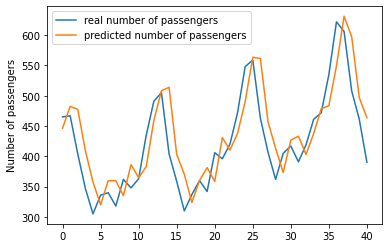

In [22]:
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('Months')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()
